**Линейная регрессия**

In [49]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

Прочитаем данные из файла, для которых будем строить модель

In [3]:
df = pd.read_csv('RealEstate.csv', sep=',', header=0)

In [4]:
df.head()

No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391                        54.8  
4     24.97937     121.54245                        43.1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
No                                        414 non-null int64
X1 transaction date                       414 non-null float64
X2 house age                              414 non-null float64
X3 distance to the nearest MRT station    414 non-null float64
X4 number of convenience stores           414 non-null int64
X5 latitude                               414 non-null float64
X6 longitude                              414 non-null float64
Y house price of unit area                414 non-null float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


Начать есть смысл с того, чтобы посмотреть, как данные связаны с зависимой переменной. Для этого обычно используются точечные графики (scatter plots):

In [7]:
def show_scatter_plot(x, y):    
    plt.scatter(x, y)
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.show()

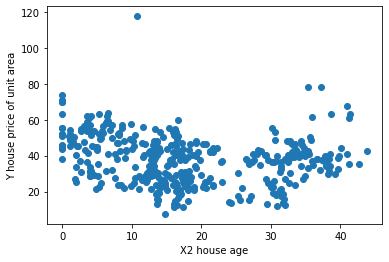

In [8]:
show_scatter_plot(df['X2 house age'], df['Y house price of unit area'])

Похоже, что до какого-то порога цена на дом падает с ростом возраста, а после тенденция разворачивается

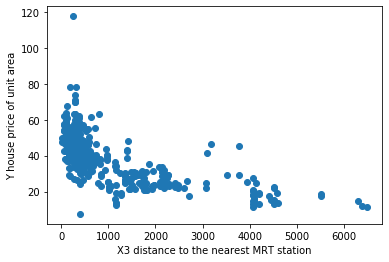

In [9]:
show_scatter_plot(df['X3 distance to the nearest MRT station'], df['Y house price of unit area'])

Очевидно, что чем больше расстояние, тем дешевле дом

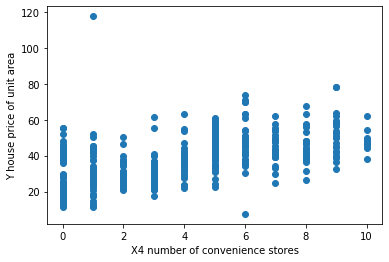

In [10]:
show_scatter_plot(df['X4 number of convenience stores'], df['Y house price of unit area'])

Очевидно, что чем больше магазинов вокруг, тем выше стоимость квадратного метра.

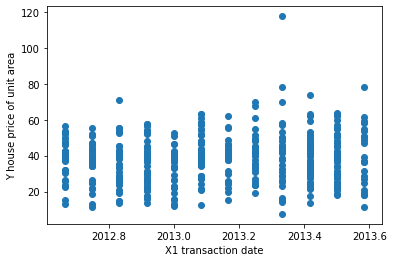

In [11]:
show_scatter_plot(df['X1 transaction date'], df['Y house price of unit area'])

Похоже, что с течением времени недвижимость склонна дорожать.

Модель линейной регрессии определена как:

$$y = c + Xb + e$$

Выберем из данных наш Х и у:

In [13]:
X = df[['X2 house age', 'X3 distance to the nearest MRT station',
          'X4 number of convenience stores', 'X1 transaction date']]

In [14]:
X

X2 house age  X3 distance to the nearest MRT station  \
0            32.0                                84.87882   
1            19.5                               306.59470   
2            13.3                               561.98450   
3            13.3                               561.98450   
4             5.0                               390.56840   
..            ...                                     ...   
409          13.7                              4082.01500   
410           5.6                                90.45606   
411          18.8                               390.96960   
412           8.1                               104.81010   
413           6.5                                90.45606   

     X4 number of convenience stores  X1 transaction date  
0                                 10             2012.917  
1                                  9             2012.917  
2                                  5             2013.583  
3                                  5             2013.500  
4                                  5             2012.833  
..                               ...                  ...  
409                                0             2013.000  
410                                9             2012.667  
411                                7             2013.250  
412                                5             2013.000  
413                                9             2013.500  

[414 rows x 4 columns]

In [15]:
y = df['Y house price of unit area'].values

In [16]:
y

array([ 37.9,  42.2,  47.3,  54.8,  43.1,  32.1,  40.3,  46.7,  18.8,
        22.1,  41.4,  58.1,  39.3,  23.8,  34.3,  50.5,  70.1,  37.4,
        42.3,  47.7,  29.3,  51.6,  24.6,  47.9,  38.8,  27. ,  56.2,
        33.6,  47. ,  57.1,  22.1,  25. ,  34.2,  49.3,  55.1,  27.3,
        22.9,  25.3,  47.7,  46.2,  15.9,  18.2,  34.7,  34.1,  53.9,
        38.3,  42. ,  61.5,  13.4,  13.2,  44.2,  20.7,  27. ,  38.9,
        51.7,  13.7,  41.9,  53.5,  22.6,  42.4,  21.3,  63.2,  27.7,
        55. ,  25.3,  44.3,  50.7,  56.8,  36.2,  42. ,  59. ,  40.8,
        36.3,  20. ,  54.4,  29.5,  36.8,  25.6,  29.8,  26.5,  40.3,
        36.8,  48.1,  17.7,  43.7,  50.8,  27. ,  18.3,  48. ,  25.3,
        45.4,  43.2,  21.8,  16.1,  41. ,  51.8,  59.5,  34.6,  51. ,
        62.2,  38.2,  32.9,  54.4,  45.7,  30.5,  71. ,  47.1,  26.6,
        34.1,  28.4,  51.6,  39.4,  23.1,   7.6,  53.3,  46.4,  12.2,
        13. ,  30.6,  59.6,  31.3,  48. ,  32.5,  45.5,  57.4,  48.6,
        62.9,  55. ,

Обчыно принято разбивать данные на 2 подгруппы: одну для обучения модели, а другую для оценки ее качества:

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X,  # первый массив, который нужно разбить
    y,  # второй массив, который нужно разбить 
    test_size=0.25,  # размер меньшей группы (20% от общего кол-ва данных)
    random_state=42  # фиксация случайного состояния: теперь при перезапусках группы будут одинаковыми
)

In [22]:
print('Размер выборки для обучения: ', len(X_train))
print('Размер выборки для тестирования: ', len(X_test))

Размер выборки для обучения:  310
Размер выборки для тестирования:  104


Теперь все готово, для построения самой модели:

In [25]:
# инициализация модели
model = LinearRegression(
    fit_intercept=True  # включить ли в модель константу "с" из формулы выше
)

In [26]:
# обучение модели
model = model.fit(X_train, y_train)

Имея обученную модель можем посмотреть на коэффициенты при переменных:

In [27]:
model.coef_

array([-2.50991678e-01, -5.64762942e-03,  1.27243777e+00,  6.25591735e+00])

In [30]:
for var_name, coef_value in zip(X.columns, model.coef_):
    print(var_name, ': ', coef_value)

X2 house age :  -0.25099167826798824
X3 distance to the nearest MRT station :  -0.005647629415519316
X4 number of convenience stores :  1.2724377692995388
X1 transaction date :  6.255917349538839


In [31]:
print('constant term: ', model.intercept_)

constant term:  -12550.410991189907


Теперь нам остается оценить, насколько хорошо наша модель предсказывает значения для тех данных, которые она еще не видела. Обычно для таких моделей пользуются среднеквадратической ошибкой:

$$MSE = mean((y_{actual} - y_{predicted})^2)$$

Так же интересно будет сравнить, насколько лучше мы прогнозируем, чем просто давая среднее значение

In [35]:
mean_forecast = np.ones_like(y_test) * np.mean(y_train)  # прогноз, осонованный на среднем значении
model_forecast = model.predict(X_test)  # прогноз, основанный на нашей модели

In [36]:
print('Ошибка прогноза, при среднем значении: ', mean_squared_error(y_test, mean_forecast))
print('Ошибка прогноза с использованием модели: ', mean_squared_error(y_test, model_forecast))

Ошибка прогноза, при среднем значении:  168.01717007924438
Ошибка прогноза с использованием модели:  70.61425733268035


**Логистическая регрессия**

Большинство моментов, описанных выше для линейной регрессии подходят и для логистической. Для примера построим модель, которая оценивает вероятность выживания на Титанике.

In [38]:
df = pd.read_csv('../lesson5/TitanicDataset.csv', sep=',', header=0)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Построим модель, которая зависи от пола, возраста и цены билета. Для этого заменим значение пола с 'male/female' на 1/0 (при построении модели разрешены только числовые переменные) и проигнорируем тех пассажиров, возраст которых неизвестен:

In [41]:
df = df[~pd.isna(df['Age'])].copy()  # игнорируем пассажиров, для которых не знаем возраст

In [42]:
df['Sex'] = np.where(df['Sex'] == 'male', 1, 0)  # замена пола на число

In [43]:
X, y = df[['Age', 'Sex', 'Fare']], df['Survived'].values  # создание набора данных

Как и в прошлый раз, разобъем данные на обучающую и тестовую группу:

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X,  # первый массив, который нужно разбить
    y,  # второй массив, который нужно разбить 
    test_size=0.2,  # размер меньшей группы (20% от общего кол-ва данных)
    random_state=42  # фиксация случайного состояния: теперь при перезапусках группы будут одинаковыми
)

In [45]:
print('Размер выборки для обучения: ', len(X_train))
print('Размер выборки для тестирования: ', len(X_test))

Размер выборки для обучения:  571
Размер выборки для тестирования:  143


Построение модели:

In [47]:
model = LogisticRegression(fit_intercept=True).fit(X_train, y_train)

Посмотрим, какие вышли коэффициенты:

In [48]:
for var_name, coef_value in zip(X.columns, model.coef_[0]):
    print(var_name, ': ', coef_value)

Age :  -0.018355894450055324
Sex :  -2.370289290630799
Fare :  0.012810151784655452


Можно провести следующий анализ коэффициентов:

- отрицательное значение при возрасте означает, что чем старше пассажир, тем меньше шансов на выживание
- отрицательно значение при поле, где в нашй кодировке 1 - это мужчина, 0 - женщина, значит, что у мужчин меньше шансов, чем у женщин
- положительное значение при цене билета значит, что чем дороже билет, тем больше шансов на выживание

Теперь оценим точность нашей модели:

In [50]:
predictions = model.predict(X_test)  # получим прогнозы из модели

In [51]:
print('Оценочная точность: ', accuracy_score(y_test, predictions))

Оценочная точность:  0.7482517482517482


Модель так же позволяет получить оценку вероятности выживания:

In [52]:
ps = model.predict_proba(X_test)[:, 1]

In [53]:
print('фактические результаты: ', y_test[:5])
print('оценки вероятностей: ', ps[:5])

фактические результаты:  [0 1 1 1 0]
оценки вероятностей:  [0.14467876 0.27142138 0.73076093 0.83820677 0.13247807]
